In [1]:
from sklearn import datasets
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

In [2]:
x_y = datasets.load_breast_cancer()

In [3]:
encoder = OrdinalEncoder()
y = encoder.fit_transform(x_y.target.reshape(-1, 1))

In [4]:
from models import NONA
model = NONA()
model.eval()
model.training

False

In [1]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.datasets import cifar

In [2]:
resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

In [10]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


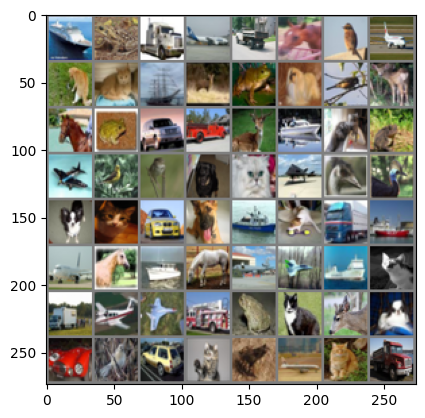

ship frog truck plane truck horse bird plane


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

trainset = torchvision.datasets.CIFAR10(root='./cifar', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Print labels for the first batch
print(' '.join(f'{classes[labels[j]]}' for j in range(8)))



In [8]:
# Load the entire CIFAR-10 dataset into a single batch
trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)

# Get the entire training data
train_dataiter = iter(trainloader)
train_images, train_labels = next(train_dataiter)

# Get the entire test data
test_dataiter = iter(testloader)
test_images, test_labels = next(test_dataiter)

print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: torch.Size([50000, 3, 32, 32])
Train labels shape: torch.Size([50000])
Test images shape: torch.Size([10000, 3, 32, 32])
Test labels shape: torch.Size([10000])


In [7]:
with torch.no_grad():
    train_images_fe = resnet(train_images)
    test_images_fe = resnet(test_images)

with open("cifar/feature_extracted/train_images.pt", "wb") as f:
    torch.save(train_images_fe, f)
with open("cifar/feature_extracted/test_images.pt", "wb") as f:
    torch.save(test_images_fe, f)
with open("cifar/feature_extracted/train_labels.pt", "wb") as f:
    torch.save(train_labels, f)
with open("cifar/feature_extracted/test_labels.pt", "wb") as f:
    torch.save(test_labels, f)

FileNotFoundError: [Errno 2] No such file or directory: 'cifar/feature_extracted/train_images.pt'

In [11]:
import torch
with open("cifar/feature_extracted/train_images.pt", "rb") as f:
    train_images_fe = torch.load(f)
with open("cifar/feature_extracted/test_images.pt", "rb") as f:
    test_images_fe = torch.load(f)
with open("cifar/feature_extracted/train_labels.pt", "rb") as f:
    train_labels = torch.load(f)
with open("cifar/feature_extracted/test_labels.pt", "rb") as f:
    test_labels = torch.load(f)

In [12]:
train_labels_ohe = torch.nn.functional.one_hot(train_labels).to(torch.float32)
test_labels_ohe = torch.nn.functional.one_hot(test_labels).to(torch.float32)

In [30]:
X_full = torch.cat([train_images_fe, test_images_fe])
y_full = torch.cat([train_labels_ohe, test_labels_ohe])
with open("cifar/feature_extracted/X.pt", "wb") as f:
    torch.save(X_full, f)
with open("cifar/feature_extracted/y.pt", "wb") as f:
    torch.save(y_full, f)

In [28]:
from models import NONA
from torch.nn import ReLU, Tanh, Sigmoid
nona = NONA(similarity='dot')
activ = Tanh()
y_hat_test = nona(activ(test_images_fe), activ(train_images_fe), train_labels_ohe)

In [29]:
test_images_fe.shape

torch.Size([10000, 1000])

In [26]:
pred_test = torch.argmax(y_hat_test, dim=1)

In [27]:
accuracy = (pred_test == test_labels).sum().item() / len(test_labels) * 100
accuracy

11.799999999999999

In [2]:
import torch
with open("cifar/feature_extracted/y.pt", "rb") as file:
    y = torch.load(file)

In [4]:
y

tensor([8., 6., 2.,  ..., 5., 1., 7.], dtype=torch.float64)

In [7]:
y = torch.Tensor(y) if type(y) != torch.Tensor else y

In [7]:
y_ohe = torch.nn.functional.one_hot(y.long()).to(torch.float64)

In [8]:
with open("cifar/feature_extracted/y_ohe.pt", "wb") as file:
    torch.save(y_ohe, file)

In [9]:
import numpy as np
import torch
my_arr = np.random.random((6,2))
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def tensor(arr):
    if type(arr) != torch.Tensor:
        arr = torch.Tensor(arr)
    return arr.to(dtype=torch.float64, device=device)
tensor(my_arr).dtype

torch.float64

In [ ]:
def arr(tensor):
    if type(arr) != torch.Tensor:
        arr = torch.Tensor(arr)
    return arr.to(dtype=torch.float64, device=device)
tensor(my_arr).dtype

In [12]:
from torch.nn.functional import softmax
softmax(torch.tensor([-1,1]).double())

/tmp/ipykernel_1776383/445702231.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax(torch.tensor([-1,1]).double())


tensor([0.1192, 0.8808], dtype=torch.float64)

In [2]:
hi = None
if hi is not None:
    print('hi')
else:
    print('bye')

bye


In [1]:
from torchvision.models import resnet18
model = resnet18(weights='DEFAULT')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /hpc/users/susmaa01/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


In [11]:
with torch.no_grad():
    train_images_18 = model(train_images)
    test_images_18 = model(test_images)

In [16]:
train_images_18.shape, test_images_18.shape
train_images_18[0]

tensor([-9.6257e+00, -4.2730e+00, -5.1950e+00, -8.1055e+00, -6.1527e+00,
        -8.6684e+00, -6.6729e+00,  5.0405e+00,  2.6653e+00,  1.1740e+00,
        -6.2525e-01,  3.4779e+00,  5.7466e-01, -1.1995e+00,  4.1226e-01,
         1.5316e+00,  2.1579e+00,  5.7767e-01,  1.5811e+00, -1.3872e+00,
        -2.4567e+00, -3.0983e+00, -6.0806e-01, -2.0289e+00,  1.6029e+00,
         2.0085e+00, -2.2720e+00, -2.9320e+00, -1.5911e+00, -4.9222e+00,
        -4.8628e+00, -2.1443e+00, -5.0622e+00, -9.1546e+00, -9.0512e+00,
        -5.6154e+00, -3.7098e+00, -1.8347e+00, -2.2819e+00, -4.2521e+00,
         2.4372e+00, -3.9680e+00, -2.0166e+00, -1.7361e+00, -2.2295e+00,
        -1.7327e+00,  1.1672e+00, -3.4068e+00, -4.4015e+00, -7.4564e+00,
        -3.6275e+00, -3.8907e+00, -5.1142e+00, -3.7902e+00, -4.9590e+00,
        -3.6969e+00, -3.3197e+00, -6.3574e+00, -5.6581e+00, -3.0732e+00,
        -4.5417e+00, -8.7546e+00, -7.2117e+00, -4.8253e+00, -3.1794e+00,
        -7.3461e+00, -3.0442e+00, -5.6897e+00, -6.2

In [7]:
import torch
torch.diag(torch.full((5,), float('inf')))

tensor([[inf, 0., 0., 0., 0.],
        [0., inf, 0., 0., 0.],
        [0., 0., inf, 0., 0.],
        [0., 0., 0., inf, 0.],
        [0., 0., 0., 0., inf]])

In [12]:
y = torch.randint(10, (5,5)).to(float)
y = torch.mean(y, dim=0, keepdim=True)
y

tensor([[4.6000, 2.8000, 5.2000, 4.6000, 2.2000]], dtype=torch.float64)

In [15]:
import torch

# Example tensor
tensor = torch.tensor([[0, 0, 0], 
                       [0, 1, 0], 
                       [1, 1, 0]], dtype=torch.float32)

# Compute the sum of each column
col_sums = tensor.sum(dim=0, keepdim=True)  # Shape (1, num_cols)
print(col_sums)
# Avoid division by zero (replace zeros with 1)
col_sums = col_sums.clamp(min=1)
print(col_sums)
# Normalize each column
normalized_tensor = tensor / col_sums

print(normalized_tensor)


tensor([[1., 2., 0.]])
tensor([[1., 2., 1.]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 0.0000]])


In [1]:
from pmlb import fetch_data
import numpy as np
# Returns a pandas DataFrame
data = fetch_data('294_satellite_image', return_X_y=True, local_cache_dir='./sat')
np.unique(data[1], return_counts=True)

(array([1., 2., 3., 4., 5., 7.]), array([1533,  703, 1358,  626,  707, 1508]))

In [2]:
from pmlb import regression_dataset_names
print(regression_dataset_names)

['1027_ESL', '1028_SWD', '1029_LEV', '1030_ERA', '1089_USCrime', '1096_FacultySalaries', '1191_BNG_pbc', '1193_BNG_lowbwt', '1196_BNG_pharynx', '1199_BNG_echoMonths', '1201_BNG_breastTumor', '1203_BNG_pwLinear', '1595_poker', '192_vineyard', '195_auto_price', '197_cpu_act', '201_pol', '207_autoPrice', '210_cloud', '215_2dplanes', '218_house_8L', '225_puma8NH', '227_cpu_small', '228_elusage', '229_pwLinear', '230_machine_cpu', '294_satellite_image', '344_mv', '4544_GeographicalOriginalofMusic', '485_analcatdata_vehicle', '503_wind', '505_tecator', '519_vinnie', '522_pm10', '523_analcatdata_neavote', '527_analcatdata_election2000', '529_pollen', '537_houses', '542_pollution', '547_no2', '556_analcatdata_apnea2', '557_analcatdata_apnea1', '560_bodyfat', '561_cpu', '562_cpu_small', '564_fried', '573_cpu_act', '574_house_16H', '579_fri_c0_250_5', '581_fri_c3_500_25', '582_fri_c1_500_25', '583_fri_c1_1000_50', '584_fri_c4_500_25', '586_fri_c3_1000_25', '588_fri_c4_1000_100', '589_fri_c2_1000

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[0],data[1], test_size=0.25, random_state=42, stratify=data[1])

In [4]:
from sklearn.preprocessing import StandardScaler
train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)
test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

In [5]:
y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
y_test = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))

In [38]:
# import torch
# with open("sat/X.pt", "wb") as file:
#     torch.save(torch.tensor(data[0]), file)
# with open("sat/y.pt", "wb") as file:
#     torch.save(torch.tensor(data[1]-1).unsqueeze(-1), file)


In [4]:
import torch
with open("sat/y.pt", "rb") as file:
    y = torch.load(file)
torch.unique(y)

tensor([0., 1., 2., 3., 4., 6.], dtype=torch.float64)

In [6]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import time

In [9]:
def tune_knn(X_train, X_test, y_train, y_test):
    
    scorer = make_scorer(mean_squared_error) 
    
    knn = KNeighborsRegressor()

    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2]
    }

    grid_search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        scoring=scorer,
        cv=4,
        verbose=1,
        n_jobs=-1
    )

    start = time.time()
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_

    y_hat_knn = best_knn.predict(X_test)
    end = time.time()
    return y_hat_knn
    # return [mean_squared_error(y_hat_knn, y_test), end-start]

In [10]:
tune_knn(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


array([0.43939394, 0.        , 0.        , ..., 0.83333333, 0.        ,
       0.33333333])

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import time

def tune_linear_regression(X_train, X_test, y_train, y_test):
    
    scorer = make_scorer(mean_squared_error) 
    
    lr = Ridge()  # Using Ridge regression to allow tuning of regularization parameter

    param_grid = {
        'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    }

    grid_search = GridSearchCV(
        estimator=lr,
        param_grid=param_grid,
        scoring=scorer,
        cv=4,
        verbose=1,
        n_jobs=-1
    )

    start = time.time()
    grid_search.fit(X_train, y_train)

    best_lr = grid_search.best_estimator_

    y_hat_lr = best_lr.predict(X_test)
    end = time.time()
    return y_hat_lr
    # return [mean_squared_error(y_hat_lr, y_test), end-start]

y_hat_lr = tune_linear_regression(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [17]:
from models import NONA
model = NONA(similarity='euclidean')

In [18]:
import torch
y_hat = model(torch.tensor(X_test), torch.tensor(X_train), torch.tensor(y_train))
mean_squared_error(y_hat, y_test)

0.028535828751698432

In [19]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
mean_squared_error(y_hat, y_test)

0.01288861266487121

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import time

def tune_random_forest(X_train, X_test, y_train, y_test):
    
    scorer = make_scorer(mean_squared_error) 
    
    rf = RandomForestRegressor(random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees
        'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
        'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
        'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
    }

    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        scoring=scorer,
        cv=4,
        verbose=1,
        n_jobs=-1
    )

    start = time.time()
    grid_search.fit(X_train, y_train)

    best_rf = grid_search.best_estimator_

    y_hat_rf = best_rf.predict(X_test)
    end = time.time()

    return [mean_squared_error(y_hat_rf, y_test), end-start]
tune_random_forest(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


In [23]:
import torch
y = torch.rand((10,))
y_hat = torch.rand((10,))
from torcheval.metrics import MeanSquaredError
metric = MeanSquaredError()
metric.update(y, y_hat)
metric.compute().item()


0.2788495421409607

In [1]:
from models import NONA_NN

model = NONA_NN(task='regression', classifier='dense', similarity='dot', input_size=10, hl_sizes=[4,5,6], mlp=False)

In [2]:
import torch
x_t = torch.rand(100,10).to(float)
x_v = torch.rand(2, 10).to(float)
y_t = torch.rand(100).to(float)

In [3]:
model(x_v, x_t, y_t).shape

torch.Size([2])

In [4]:
for params in model.parameters():
    print(params)

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([[-0.2650,  0.0428,  0.2917,  0.0653, -0.2992,  0.1081,  0.1238,  0.0071,
          0.0698, -0.1261]], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([0.1495], dtype=torch.float64, requires_grad=True)


In [1]:
import os
import glob
from transformers import AutoTokenizer
from datasets import Dataset

# Define paths
TEXT_DIR = "data/adresso/ADReSSo21_test/transcripts"  # Change this to your text file directory

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def load_text_files(directory):
    """Load all text files from a directory and return a list of strings."""
    text_data = []
    file_paths = glob.glob(os.path.join(directory, "*.txt"))
    
    for file_path in file_paths:
        with open(file_path, "r", encoding="utf-8") as f:
            text_data.append(f.read().strip())
    
    return text_data

# Load text data
texts = load_text_files(TEXT_DIR)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

# Create dataset
dataset = Dataset.from_dict({"text": texts})

# Tokenize dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Show an example
print(tokenized_dataset[0])

/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 71/71 [00:00<00:00, 2649.47 examples/s]

{'text': "Oh, Johnny is sneaking cookies out of the cookie jar for his sister's suit.\n Mother is washing the dishes and the sink is overflowing with the water on the floor.\n The curtains are spread aside to let the light in.\n There's plates and saucers on the table here.\n Shall I tell you some more?\n Just tell me everything you see going on in the picture and tell me what you think is true.\n No, I'm fine.", 'input_ids': [101, 2821, 1010, 5206, 2003, 20727, 16324, 2041, 1997, 1996, 17387, 15723, 2005, 2010, 2905, 1005, 1055, 4848, 1012, 2388, 2003, 12699, 1996, 10447, 1998, 1996, 7752, 2003, 2058, 12314, 2075, 2007, 1996, 2300, 2006, 1996, 2723, 1012, 1996, 14694, 2024, 3659, 4998, 2000, 2292, 1996, 2422, 1999, 1012, 2045, 1005, 1055, 7766, 1998, 12901, 2869, 2006, 1996, 2795, 2182, 1012, 4618, 1045, 2425, 2017, 2070, 2062, 1029, 2074, 2425, 2033, 2673, 2017, 2156, 2183, 2006, 1999, 1996, 3861, 1998, 2425, 2033, 2054, 2017, 2228, 2003, 2995, 1012, 2053, 1010, 1045, 1005, 1049, 298

In [1]:
import pandas as pd
all_features = pd.read_csv('data/adresso/all_features.csv')
all_features

,id,mmse,dx,path
0,adrso024,20,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...
1,adrso025,11,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...
2,adrso027,18,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...
3,adrso028,18,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...
4,adrso031,26,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...
...,...,...,...,...
232,adrsdt55,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...
233,adrsdt68,30,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...
234,adrsdt31,28,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...
235,adrsdt5,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...


In [3]:
def get_text(path):
    with open(path, "r", encoding="utf-8") as f:
            text = f.read().strip()
    return text

all_features['text'] = all_features['path'].apply(lambda x: get_text(x))

In [5]:
all_features.loc[4, 'text']

"What do you see going on?\n Well, the boy's on a ladder, and the ladder's tipped over.\n Not a ladder, it's a step step.\n And, uh, he's coming.\n From what I can see, he's going to upset the cookies.\n Yeah.\n And, uh, the sink is falling over on the floor,\n while the mother, I guess, is drying the dishes.\n Well, I'm telling you, that one might be on a step stool.\n It's not even a step stool, it's just a stool.\n Anything else going on?\n The water's overflowing on the floor.\n Okay.\n There's probably some more water in the back.\n This wouldn't go down, I'm not too sure.\n Except that the water's going down.\n Can you see anything else?\n I'm trying to figure out what this is on here.\n Okay, well that's fine, that's fine."

In [6]:
all_features.to_parquet('data/adresso/x_y.parquet', index=False)

In [1]:
import pandas as pd
x_y = pd.read_parquet('data/adresso/x_y.parquet')
x_y

,id,mmse,dx,path,text
0,adrso024,20,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...,"There's a cookie jar, and the lid is off the c..."
1,adrso025,11,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...,"Tell me everything that's going on.\n Well, th..."
2,adrso027,18,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...,That's a picture of a little girl and a little...
3,adrso028,18,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...,"how she would find her, and the mother's where..."
4,adrso031,26,1,data/adresso/ADReSSo21_train/transcripts/ad/ad...,"What do you see going on?\n Well, the boy's on..."
...,...,...,...,...,...
232,adrsdt55,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,"There it is.\n Okay, the picture is in a kitch..."
233,adrsdt68,30,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,"Okay, the boy is standing on a stool that is t..."
234,adrsdt31,28,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,This boy is about to fall off the stool.\n The...
235,adrsdt5,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,"I'm going to show you a picture, and in the pi..."


In [92]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
class AdressoDataset(Dataset):
    def __init__(self, label, tokenizer, scalar=None, ids_list=None):
        super(AdressoDataset, self).__init__()
        self.ids_list = ids_list
        self.label = label
        self.scalar = scalar
        full_df = pd.read_parquet('data/adresso/x_y.parquet')
        if self.ids_list is None:
            id_char = 'd'
        else:
            id_char = 'o'
        self.df = full_df[full_df['id'].str[4]==id_char]
        
        if self.ids_list is not None:
            self.df = self.df[self.df['id'].str[-3:].astype(int).isin(self.ids_list)]

        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.df)

    def __scale_label__(self, label):
        if self.scalar == None:
            labels = self.df['mmse']
            min_label, max_label = labels.min(), labels.max()
            self.scalar = [min_label, max_label]
        else:
            min_label, max_label = self.scalar[0], self.scalar[1]
        
        return (label - min_label) / (max_label - min_label)
    
    def __getitem__(self, idx):
        text = self.df.loc[idx, 'text']
        
        text = self.tokenizer(text, padding="max_length", truncation=True)

        label = self.df.loc[idx, self.label]
        
        if self.label == 'mmse':
            label = self.__scale_label__(label)

        return text, label

In [271]:
from datasets import Dataset
import pandas as pd

class AdressoDataset:
    def __init__(self, label, tokenizer, scalar=None, ids=None):
        self.ids = ids
        self.label = label
        self.scalar = scalar

        # Load full DataFrame
        full_df = pd.read_parquet('data/adresso/x_y.parquet')

        # Determine character filter for `id`
        id_char = 'd' if self.ids is None else 'o'
        df = full_df[full_df['id'].str[4] == id_char]

        # Apply `ids_list` filtering if provided
        if self.ids is not None:
            df = df[df['id'].isin(self.ids)]

        self.df = df  # Save filtered DataFrame

        # Convert Pandas DataFrame to Hugging Face Dataset
        self.dataset = Dataset.from_pandas(self.df)

        # Tokenizer
        self.tokenizer = tokenizer

        # Compute scalar values if needed
        if self.label == 'mmse' and self.scalar is None:
            labels = self.df['mmse']
            self.scalar = [labels.min(), labels.max()]

        # Apply tokenization and label scaling
        extra_cols = ["id", "dx", "mmse", "mmse binned", "path", "text", "__index_level_0__"]
        self.dataset = self.dataset.map(self.process_example, remove_columns=extra_cols)

    def len(self):
        return len(self.df)

    def scale_label(self, label):
            min_label, max_label = self.scalar
            return (label - min_label) / (max_label - min_label)

    def process_example(self, example):
        """Tokenizes text and scales labels if needed."""
        tokenized = self.tokenizer(example["text"], padding="max_length", truncation=True)

        label = example[self.label]
        if self.label == "mmse":
            label = self.scale_label(label)

        tokenized["labels"] = label  # Add label to the tokenized output
        return tokenized

    def get_dataset(self):
        """Returns the processed Hugging Face dataset."""
        return self.dataset


In [272]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_dataset = AdressoDataset(label="mmse", tokenizer=tokenizer, ids=[24,25,27,28,31])

# Get processed dataset
tr_hf_dataset = train_dataset.get_dataset()


In [274]:
train_dataset.df

,id,mmse,dx,path,text,mmse binned


In [148]:
from sklearn.model_selection import train_test_split

full_df = pd.read_parquet('data/adresso/x_y.parquet')
df = full_df[full_df['id'].str[4] == 'o']


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

<Axes: ylabel='Frequency'>

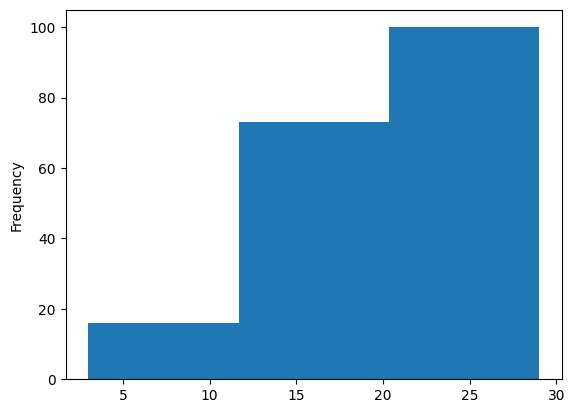

In [170]:
df_no_thirty = full_df[full_df['mmse']!=30]
df_no_thirty['mmse'].plot.hist(bins=3)

In [171]:
full_df['mmse'].value_counts()

mmse
30    48
29    35
28    22
20    19
17    11
27    10
24     9
19     9
18     7
25     7
10     7
12     7
26     6
15     6
13     6
23     5
22     4
14     4
16     4
11     3
3      2
21     2
8      2
7      1
5      1
Name: count, dtype: int64

In [172]:
df_no_thirty['mmse binned'] = pd.cut(df_no_thirty['mmse'], bins=3, labels=[0,1,2])

/tmp/ipykernel_2583521/3273656062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_thirty['mmse binned'] = pd.cut(df_no_thirty['mmse'], bins=3, labels=[0,1,2])


In [173]:
df_thirty = full_df[full_df['mmse']==30]
df_thirty['mmse binned'] = 4

/tmp/ipykernel_2583521/2168234906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thirty['mmse binned'] = 4


In [174]:
full_df_binned = pd.concat([df_thirty, df_no_thirty])

In [175]:
full_df_binned

,id,mmse,dx,path,text,mmse binned
88,adrso003,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"Starting from the left, I see two children sta...",4
90,adrso007,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"A mother standing by the sink, kind of looks l...",4
94,adrso014,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,I see a woman who has zoned out.\n She's in a ...,4
97,adrso017,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"All right, we have a few more tasks to go thro...",4
99,adrso019,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"Okay, little boy's on a stool that he looks li...",4
...,...,...,...,...,...,...
230,adrsdt47,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,Tell me everything that you see going on in th...,2
232,adrsdt55,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,"There it is.\n Okay, the picture is in a kitch...",2
234,adrsdt31,28,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,This boy is about to fall off the stool.\n The...,2
235,adrsdt5,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,"I'm going to show you a picture, and in the pi...",2


In [176]:
df_binned_tv = full_df_binned[full_df_binned['id'].str[4] == 'o']

In [179]:
train_ids, val_ids = train_test_split(df_binned_tv['id'], stratify=df_binned_tv['mmse binned'], test_size=0.15, random_state=42)

In [180]:
train_ids

72     adrso228
40     adrso122
25     adrso072
43     adrso126
133    adrso262
         ...   
14     adrso049
117    adrso167
165    adrso316
16     adrso054
118    adrso168
Name: id, Length: 141, dtype: object

In [182]:
full_df_binned['mmse'].value_counts()

mmse
30    48
29    35
28    22
20    19
17    11
27    10
24     9
19     9
25     7
18     7
12     7
10     7
26     6
13     6
15     6
23     5
22     4
14     4
16     4
11     3
3      2
21     2
8      2
7      1
5      1
Name: count, dtype: int64

In [184]:
full_df_binned.to_parquet('data/adresso/x_y.parquet', index=False)

In [188]:
df = pd.read_parquet('data/adresso/x_y.parquet')

In [189]:
df

,id,mmse,dx,path,text,mmse binned
0,adrso003,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"Starting from the left, I see two children sta...",4
1,adrso007,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"A mother standing by the sink, kind of looks l...",4
2,adrso014,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,I see a woman who has zoned out.\n She's in a ...,4
3,adrso017,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"All right, we have a few more tasks to go thro...",4
4,adrso019,30,0,data/adresso/ADReSSo21_train/transcripts/cn/ad...,"Okay, little boy's on a stool that he looks li...",4
...,...,...,...,...,...,...
232,adrsdt47,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,Tell me everything that you see going on in th...,2
233,adrsdt55,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,"There it is.\n Okay, the picture is in a kitch...",2
234,adrsdt31,28,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,This boy is about to fall off the stool.\n The...,2
235,adrsdt5,29,0,data/adresso/ADReSSo21_test/transcripts/adrsdt...,"I'm going to show you a picture, and in the pi...",2


In [227]:
train_ids, val_ids = train_test_split(df['id'], stratify=df['dx'], test_size=0.15, random_state=42)

In [228]:
val_ids

118    adrso223
53     adrso032
162    adrso262
148    adrso157
236    adrsdt48
170    adrso286
23     adrso270
83     adrso106
228    adrsdt43
79     adrso090
175    adrso302
174    adrso300
90     adrso125
134    adrso253
20     adrso266
58     adrso043
87     adrso116
94     adrso134
74     adrso074
224    adrsdt27
180    adrsdt40
223    adrsdt34
14     adrso172
198    adrsdt13
201     adrsdt2
194    adrsdt62
51     adrso028
80     adrso092
159    adrso186
209    adrsdt42
69     adrso063
119    adrso224
108    adrso205
225    adrsdt54
139    adrso012
2      adrso014
Name: id, dtype: object

In [275]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_dataset = AdressoDataset(label="dx", tokenizer=tokenizer, ids=train_ids)

# Get processed dataset
tr_hf_dataset = train_dataset.get_dataset()

Map: 100%|██████████| 140/140 [00:00<00:00, 2067.52 examples/s]


In [276]:
val_dataset = AdressoDataset(label="dx", tokenizer=tokenizer, ids=val_ids, scalar=train_dataset.scalar)

# Get processed dataset
val_hf_dataset = val_dataset.get_dataset()

Map: 100%|██████████| 26/26 [00:00<00:00, 1767.43 examples/s]


In [277]:
test_dataset = AdressoDataset(label="dx", tokenizer=tokenizer, scalar=train_dataset.scalar)

# Get processed dataset
test_hf_dataset = test_dataset.get_dataset()

Map: 100%|██████████| 71/71 [00:00<00:00, 1978.13 examples/s]


In [279]:
train_dataset.len()

140

In [232]:
import torch

def collate_fn(batch):
    """Convert a batch of tokenized dicts into PyTorch tensors."""
    input_ids = torch.tensor([item["input_ids"] for item in batch])
    attention_mask = torch.tensor([item["attention_mask"] for item in batch])
    labels = torch.tensor([item["labels"] for item in batch], dtype=torch.float)

    return {"input_ids": input_ids, "attention_mask": attention_mask, "labels": labels}


In [233]:
train_dataloader = DataLoader(
    train_dataset.get_dataset(),
    batch_size=16,
    shuffle=True,
    collate_fn=collate_fn  # Ensure proper formatting
)


In [234]:
for batch in train_dataloader:
    print(batch["input_ids"].shape)  # (batch_size, max_length)
    print(batch["labels"])  # (batch_size,)


torch.Size([16, 512])
tensor([1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.])
torch.Size([16, 512])
tensor([0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.])
torch.Size([16, 512])
tensor([1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.])
torch.Size([16, 512])
tensor([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.])
torch.Size([16, 512])
tensor([1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
torch.Size([16, 512])
tensor([1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
torch.Size([16, 512])
tensor([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.])
torch.Size([16, 512])
tensor([1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
torch.Size([12, 512])
tensor([0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.])


In [1]:
from transformers import AutoModel
import torch.nn as nn
import torch

# Load DistilBERT model (without classifier head)
model = AutoModel.from_pretrained("distilbert-base-uncased")


# Send batch to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Example Forward Pass
for batch in train_dataloader:
    batch = {key: val.to(device) for key, val in batch.items() if key!='labels'}  # Move to GPU
    outputs = model(**batch)

/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [254]:
outputs.last_hidden_state[:,0,:]

torch.float32

In [256]:
isinstance(batch, dict)

True

In [281]:
fe = AutoModel.from_pretrained("distilbert-base-uncased")

In [296]:
    for name, module in fe.named_modules():
        pass
module.out_features

AttributeError: 'LayerNorm' object has no attribute 'out_features'

In [295]:
from torch.nn import Linear
my_lin = Linear(1000,200)

AttributeError: 'Linear' object has no attribute 'shape'

In [8]:
from torchvision.models import resnet18
from transformers import AutoModel

In [13]:
res = resnet18(weights='DEFAULT')
bert = AutoModel.from_pretrained("distilbert-base-uncased")
def get_output_size(model):
    for name, module in model.named_modules():
        pass
    
    if hasattr(module, 'out_features'):
        return module.out_features
    elif hasattr(module, 'normalized_shape'):
        return module.normalized_shape[0]
get_output_size(bert)
    

768

In [12]:
from importlib import reload
import torch
import torch.nn.functional as F
import models
reload(models)
knn = models.KNN(2)

In [21]:
m = torch.hstack([F.one_hot(torch.arange(0, 5) % 3), F.one_hot(torch.arange(0, 5) % 2)]).to(float)
m -= torch.diag(torch.full((len(m),), float('inf')))
print(m)
knn(m)

tensor([[-inf, 0., 0., 1., 0.],
        [0., -inf, 0., 0., 1.],
        [0., 0., -inf, 1., 0.],
        [1., 0., 0., -inf, 1.],
        [0., 1., 0., 1., -inf]], dtype=torch.float64)


tensor([[inf, inf, 0., 0., inf],
        [inf, inf, 0., inf, 0.],
        [inf, 0., inf, 0., inf],
        [0., inf, inf, inf, 0.],
        [inf, 0., inf, 0., inf]], dtype=torch.float64)

In [23]:
m - knn(m)

tensor([[-inf, -inf, 0., 1., -inf],
        [-inf, -inf, 0., -inf, 1.],
        [-inf, 0., -inf, 1., -inf],
        [1., -inf, -inf, -inf, 1.],
        [-inf, 1., -inf, 1., -inf]], dtype=torch.float64)

In [3]:
from torcheval.metrics.aggregation.auc import AUC
import torch

In [8]:
auc = AUC()
auc.update(torch.tensor([0, 0.2, 0.3, 0.1]), torch.tensor([1,1,1,1])).compute().item()

0.30000001192092896